In [6]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from data import *

<Axes: >

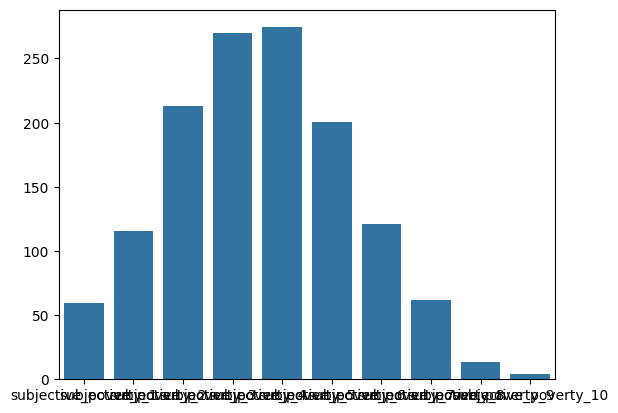

In [2]:
filename = "elasticnet-logistic-1(manual mod)-2.csv"
predictions = pd.read_csv(os.path.join(PREDICTIONS_DIR, filename))
prediction_probabilities = predictions.iloc[:, 1:]
sns.barplot(data=prediction_probabilities.sum(axis=0))

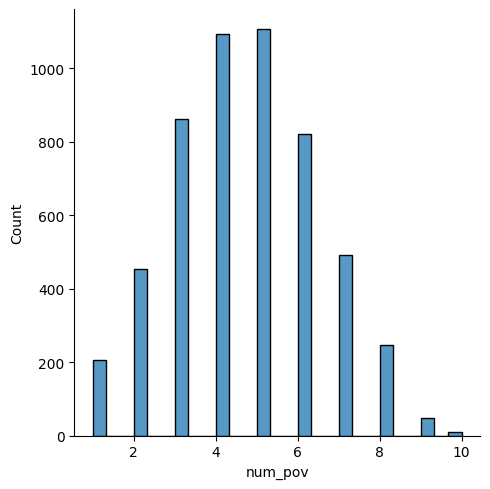

In [3]:
from data import combined_train_with_num_pov

sns.displot(combined_train_with_num_pov["num_pov"])

## Mahalanobis distance


In [11]:
import numpy as np
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from sklearn.pipeline import Pipeline


from data import *

_, doi, _ = get_divided_edu(
    remove_boring_columns(transform_all_house(combined_transformed_train_with_num_pov))
)
doi = doi.drop(columns=["edu_q09", "edu_q10", "edu_q11", "edu_q12", "edu_q13"])

preprocessor = get_preprocessor(
    ordinal_transformer=Pipeline([("imputer", "passthrough")]),
    imputer_strategy=[
        "most_frequent",
        "most_frequent",
        "median",
        "median",
    ],
    remainder="drop",
)

doi_processed = preprocessor.fit_transform(doi)

robust_cov = MinCovDet().fit(doi_processed)
emp_cov = EmpiricalCovariance().fit(doi_processed)

emp_mahal = emp_cov.mahalanobis(doi_processed - np.mean(doi_processed, axis=0)) ** (
    0.33
)
robust_mahal = robust_cov.mahalanobis(doi_processed - robust_cov.location_) ** (0.33)

/Users/borisleung/Desktop/STA841Kaggle/data.py:282: FutureWarning: using <built-in method join of str object at 0x102b71770> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df[fathers_in_house_mask]["psu_hh_idcode"].str.split("_").str[:-1].agg("_".join)
/Users/borisleung/Desktop/STA841Kaggle/data.py:251: FutureWarning: using <built-in method join of str object at 0x102b71770> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df[mothers_in_house_mask]["psu_hh_idcode"].str.split("_").str[:-1].agg("_".join)


In [ ]:
doi

In [3]:
doi_processed

,binary__house_q02_2.0,binary__house_q07_1.0,binary__house_q07_2.0,binary__house_q11_2.0,binary__house_q14_1.0,binary__house_q14_2.0,binary__house_q17_2.0,binary__house_q20_1.0,binary__house_q20_2.0,binary__edu_q08_2.0,...,numerical__edu_q18,ordinal__house_q13,ordinal__house_q19,ordinal__edu_q01,ordinal__edu_q02,ordinal__edu_q04,ordinal__edu_q05,ordinal__edu_q06,ordinal__edu_q12,ordinal__edu_q13
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.216216,2.0,3.0,1.0,1.0,1.0,8.0,2.0,-999.0,-999.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.216216,1.0,1.0,1.0,1.0,1.0,8.0,2.0,-999.0,-999.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.216216,1.0,1.0,1.0,1.0,1.0,8.0,2.0,-999.0,-999.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.216216,2.0,2.0,1.0,1.0,1.0,8.0,2.0,-999.0,-999.0
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.378378,1.0,1.0,1.0,1.0,1.0,4.0,1.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5332,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.108108,1.0,1.0,1.0,1.0,1.0,4.0,1.0,-999.0,-999.0
5333,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.216216,1.0,1.0,1.0,1.0,1.0,8.0,2.0,-999.0,-999.0
5334,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.324324,1.0,1.0,1.0,1.0,5.0,4.0,6.0,-999.0,-999.0
5335,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.432432,-999.0,1.0,1.0,1.0,6.0,4.0,9.0,-999.0,-999.0


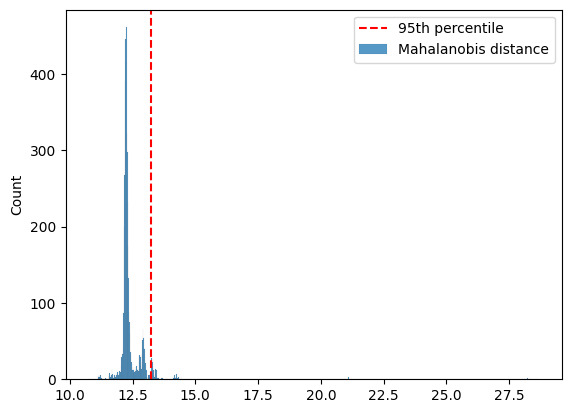

In [ ]:
threshold = np.percentile(robust_mahal, 95)
sns.histplot(robust_mahal)
plt.axvline(threshold, color="r", linestyle="--")
plt.legend(["95th percentile", "Mahalanobis distance"])

In [ ]:
doi

In [ ]:
robust_mahal_outliers = robust_mahal > threshold
outliers = doi[robust_mahal_outliers]
outliers

,psu_hh_idcode,subjective_poverty_1,subjective_poverty_2,subjective_poverty_3,subjective_poverty_4,subjective_poverty_5,subjective_poverty_6,subjective_poverty_7,subjective_poverty_8,subjective_poverty_9,...,edu_q04,edu_q05,edu_q06,edu_q07,edu_q08,edu_q17,edu_q18,edu_q19,edu_q20,num_pov
14,647_5_2,0,0,0,1,0,0,0,0,0,...,5.0,4.0,6.0,3.0,2.0,13.0,18.0,2.0,-999.0,4
20,174_2_3,0,1,0,0,0,0,0,0,0,...,5.0,4.0,6.0,3.0,2.0,2.0,18.0,2.0,-999.0,2
27,376_4_2,0,0,0,0,1,0,0,0,0,...,6.0,3.0,7.0,0.0,2.0,13.0,21.0,2.0,-999.0,5
42,477_8_1,0,0,0,0,1,0,0,0,0,...,6.0,3.0,3.0,0.0,2.0,2.0,21.0,2.0,-999.0,5
68,710_12_1,0,0,0,0,0,1,0,0,0,...,6.0,3.0,7.0,2.0,2.0,13.0,21.0,2.0,-999.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5292,491_6_1,0,0,0,0,0,0,1,0,0,...,1.0,8.0,2.0,0.0,1.0,2.0,14.0,2.0,-999.0,7
5293,273_1_1,0,0,0,0,1,0,0,0,0,...,5.0,4.0,6.0,0.0,2.0,13.0,18.0,2.0,-999.0,5
5318,336_1_2,0,0,0,0,1,0,0,0,0,...,8.0,2.0,8.0,1.0,2.0,13.0,24.0,2.0,-999.0,5
5331,399_9_1,0,0,0,1,0,0,0,0,0,...,1.0,2.0,0.0,1.0,2.0,13.0,7.0,2.0,-999.0,4


In [17]:
robust_mahal_outliers.tofile("outliers.csv", sep=",")

In [19]:
not_outliers = doi[~robust_mahal_outliers]
not_outliers

,psu_hh_idcode,subjective_poverty_1,subjective_poverty_2,subjective_poverty_3,subjective_poverty_4,subjective_poverty_5,subjective_poverty_6,subjective_poverty_7,subjective_poverty_8,subjective_poverty_9,...,edu_q04,edu_q05,edu_q06,edu_q07,edu_q08,edu_q17,edu_q18,edu_q19,edu_q20,num_pov
0,30_8_1,0,0,0,1,0,0,0,0,0,...,1.0,8.0,2.0,1.0,2.0,13.0,14.0,2.0,-999.0,4
1,194_1_2,1,0,0,0,0,0,0,0,0,...,1.0,8.0,2.0,0.0,2.0,13.0,14.0,2.0,-999.0,1
2,224_6_1,0,0,1,0,0,0,0,0,0,...,1.0,8.0,2.0,0.0,2.0,13.0,14.0,2.0,-999.0,3
3,323_10_1,0,0,0,0,1,0,0,0,0,...,1.0,8.0,2.0,0.0,2.0,13.0,14.0,2.0,-999.0,5
4,428_10_1,0,0,0,1,0,0,0,0,0,...,1.0,4.0,1.0,0.0,2.0,14.0,20.0,2.0,-999.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,753_8_2,0,0,1,0,0,0,0,0,0,...,1.0,4.0,1.0,0.0,2.0,13.0,10.0,2.0,-999.0,3
5332,571_8_1,0,0,1,0,0,0,0,0,0,...,1.0,4.0,1.0,0.0,2.0,2.0,10.0,2.0,-999.0,3
5333,601_5_1,0,0,0,1,0,0,0,0,0,...,1.0,8.0,2.0,0.0,2.0,13.0,14.0,2.0,-999.0,4
5335,606_3_1,0,0,0,0,1,0,0,0,0,...,6.0,4.0,9.0,0.0,2.0,2.0,22.0,2.0,-999.0,5
